In [1]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
X_train, X_train.shape, X_test.shape

(array([[[[ 59,  62,  63],
          [ 43,  46,  45],
          [ 50,  48,  43],
          ...,
          [158, 132, 108],
          [152, 125, 102],
          [148, 124, 103]],
 
         [[ 16,  20,  20],
          [  0,   0,   0],
          [ 18,   8,   0],
          ...,
          [123,  88,  55],
          [119,  83,  50],
          [122,  87,  57]],
 
         [[ 25,  24,  21],
          [ 16,   7,   0],
          [ 49,  27,   8],
          ...,
          [118,  84,  50],
          [120,  84,  50],
          [109,  73,  42]],
 
         ...,
 
         [[208, 170,  96],
          [201, 153,  34],
          [198, 161,  26],
          ...,
          [160, 133,  70],
          [ 56,  31,   7],
          [ 53,  34,  20]],
 
         [[180, 139,  96],
          [173, 123,  42],
          [186, 144,  30],
          ...,
          [184, 148,  94],
          [ 97,  62,  34],
          [ 83,  53,  34]],
 
         [[177, 144, 116],
          [168, 129,  94],
          [179, 142,  87],
   

In [4]:
y_train.shape

(50000, 1)

샘플크기 :  (5000, 32, 32, 3)


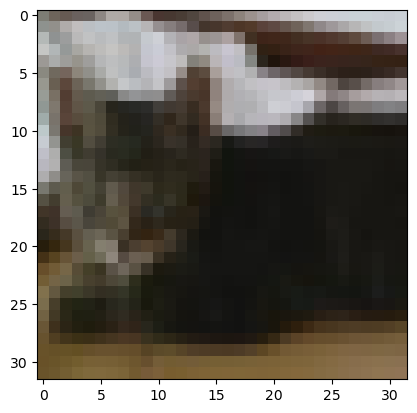

In [5]:
cat_filt = (y_train == 3)
cat_filt = cat_filt.reshape(1,-1)
cat_sample = X_train[cat_filt[0]]
plt.imshow(cat_sample[0])
print("샘플크기 : ",cat_sample.shape)

샘플크기 :  (5000, 32, 32, 3)


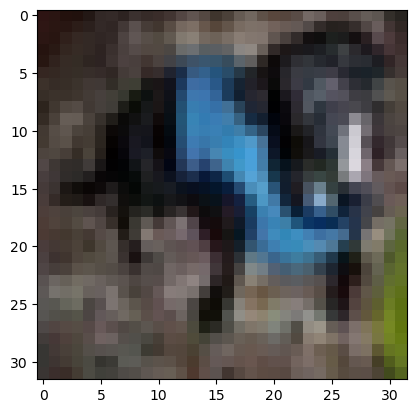

In [6]:
dog_filt = (y_train == 5)
dog_filt = dog_filt.reshape(1,-1)
dog_sample = X_train[dog_filt[0]]
plt.imshow(dog_sample[0])
print("샘플크기 : ",dog_sample.shape)

In [7]:
train_filt = cat_filt | dog_filt
X_train = X_train[train_filt[0]]
y_train = y_train[train_filt[0]]
test_filt = (y_test == 3) | (y_test == 5)
test_filt = test_filt.reshape(1,-1)
X_test = X_test[test_filt[0]]
y_test = y_test[test_filt[0]]
y_train = (y_train.reshape(1,-1))[0]
y_test = (y_test.reshape(1,-1))[0]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000,), (2000, 32, 32, 3), (2000,))

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

X_train /= 255  
X_test /= 255                            

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y_train)
y_train = pd.get_dummies(y1).values

y1 = encoder.fit_transform(y_test)
y_test = pd.get_dummies(y1).values

print("Training matrix shape", X_train.shape)

print("Testing matrix shape", X_test.shape)

Training matrix shape (10000, 32, 32, 3)
Testing matrix shape (2000, 32, 32, 3)


In [9]:
y_train

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                              input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())#2차원 데이터를 1차원으로 변경
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 100)               819300    
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 2)                 202       
                                                      

In [22]:
from sklearn.model_selection import train_test_split
X_train2,X_test2, y_train2,y_test2 = train_test_split(X_test,y_test,test_size=0.2,random_state=0) #데이터 셋이 너무 커서 줄임

model_history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=32,validation_data= (X_test,y_test))

Epoch 1/50
313/313 [==============================] - 6s 18ms/step - loss: 0.6894 - accuracy: 0.5629 - val_loss: 0.6445 - val_accuracy: 0.6430
Epoch 2/50
313/313 [==============================] - 6s 18ms/step - loss: 0.6307 - accuracy: 0.6433 - val_loss: 0.6065 - val_accuracy: 0.6750
Epoch 3/50
313/313 [==============================] - 5s 17ms/step - loss: 0.5961 - accuracy: 0.6806 - val_loss: 0.5789 - val_accuracy: 0.6955
Epoch 4/50
313/313 [==============================] - 5s 17ms/step - loss: 0.5711 - accuracy: 0.6977 - val_loss: 0.5742 - val_accuracy: 0.6970
Epoch 5/50
313/313 [==============================] - 5s 17ms/step - loss: 0.5502 - accuracy: 0.7199 - val_loss: 0.5782 - val_accuracy: 0.6935
Epoch 6/50
313/313 [==============================] - 5s 17ms/step - loss: 0.5311 - accuracy: 0.7344 - val_loss: 0.5712 - val_accuracy: 0.6970
Epoch 7/50
313/313 [==============================] - 5s 17ms/step - loss: 0.5146 - accuracy: 0.7472 - val_loss: 0.5600 - val_accuracy: 0.7105

In [23]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

63/63 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.72      0.70      0.71      1000

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000

[[735 265]
 [304 696]]


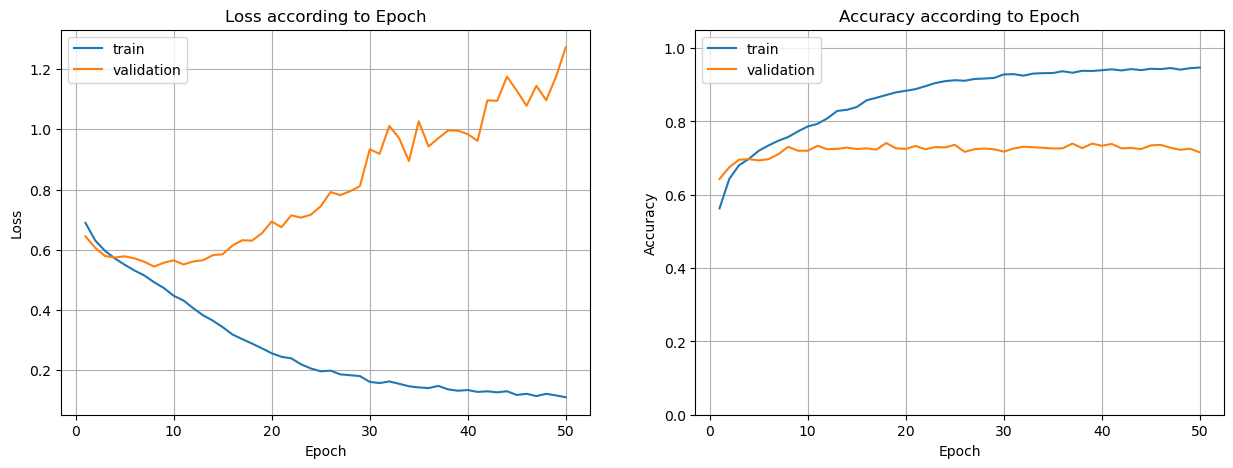

In [25]:
import pandas as pd

df_hist = pd.DataFrame(model_history.history)
df_hist['epoch'] = range(1, 51)

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title('Loss according to Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(df_hist['epoch'], df_hist['loss'], label='train')
plt.plot(df_hist['epoch'], df_hist['val_loss'], label = 'validation')
# plt.ylim([0, 1.5])
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy according to Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(df_hist['epoch'], df_hist['accuracy'], label='train')
plt.plot(df_hist['epoch'], df_hist['val_accuracy'], label='validation')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()

plt.show()